# Trabajo Práctico N4. Procesamiento de Imágenes

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Funciones auxiliares

def myplotimg (img,vmin=0,vmax=255,title=None):
  plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)
  if title != None:
    plt.title(title)
  plt.axis("off")
  plt.show()
  return

def show_side_by_side(imgs, subtitles = None, title = None, vmin=0, vmax=255):
    fig, axes = plt.subplots(1, len(imgs))
    if len(imgs) == 1:
        axes = [axes]
    if title is not None:
        fig.suptitle(title, y=0.8)
    if subtitles is None:
        subtitles = [None for _ in imgs]
    for ax, img, subtitle in zip(axes, imgs, subtitles):
        if subtitle is not None:
            ax.set_title(subtitle)
        ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

El valor mas alto de un pixel en la imagen es: 227
El valor mas bajo de un pixel en la imagen es: 0


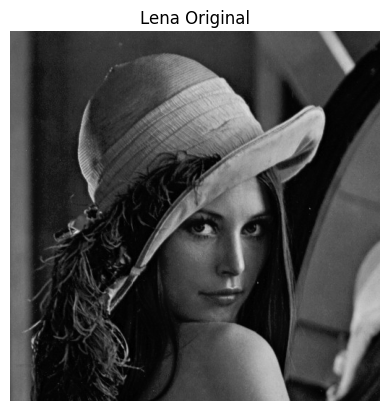

In [3]:
img1=cv2.imread("images/lena_gray.tif",cv2.IMREAD_GRAYSCALE)
print("El valor mas alto de un pixel en la imagen es:", np.amax(img1))
print("El valor mas bajo de un pixel en la imagen es:", np.amin(img1))
myplotimg(img1,title="Lena Original")


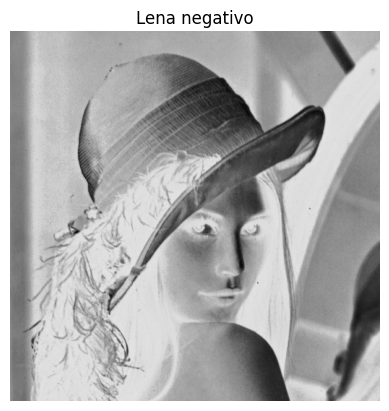

In [4]:
#Para obtener el negativo de la imagen, deberiamos "mapear" los valores altos a bajos, y viceversa.
img_neg = img1 * (-1)                             #Invertimos los valores de cada px
lena_neg = img_neg + np.amax(img1)                 #Desplazamos acorde a la escala inicial
#Mostramos el resultado
myplotimg(lena_neg,title="Lena negativo")

Ahora, buscamos una transformacion que mapee valores de [0.25,0.5] en [0,1]

In [5]:
#Recibe un input de tipo np.ndarray y lo mapea al rango de valores [0,1]
def uniform_mapping(input):
  min = np.amin(input)
  max = np.amax(input)
  mapped = input - min
  mapped = mapped / 0.25
  return mapped

In [6]:
array = np.arange(0.25,0.51,0.05)
print(array)
mapped_arr = uniform_mapping(array)
print(mapped_arr)

[0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.  0.2 0.4 0.6 0.8 1. ]


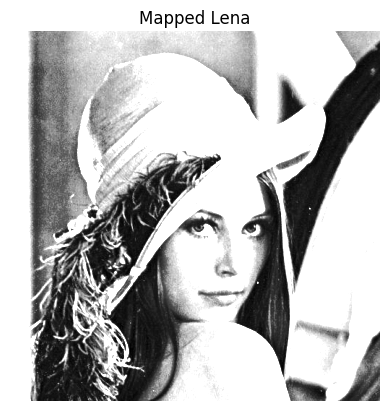

In [7]:
mapped_lena = uniform_mapping(img1)
#Mostramos el resultado
myplotimg(mapped_lena,title="Mapped Lena")

## 2)
Dada la imagen del globo ocular buscar transformaciones que permitan resaltar las venas lo mejor posible (Imagen eyebw.jpg)

In [8]:
#Defino 3 transformaciones basicas vistas en clases, como funciones para mejor legibilidad
#Requisitos:numpy
def img_transform_neg(img):
  #Para obtener el negativo de la imagen, deberiamos "mapear" los valores altos a bajos, y viceversa.
  img_neg = img * (-1)                             #Invertimos los valores de cada px
  img_neg = img_neg + np.amax(img)                 #Desplazamos acorde a la escala inicial
  return img_neg

def img_transform_log(img,c=0.5):
  img_scale = img / 255
  img_log = c * np.log(img_scale + 1)
  img_log = img_log*255
  return img_log

def img_transform_exp(img,gamma=0.3,c=0.5):
  img_scale = img / 255
  img_exp = c * (img_scale**gamma)
  img_exp = img_exp*255
  return img_exp

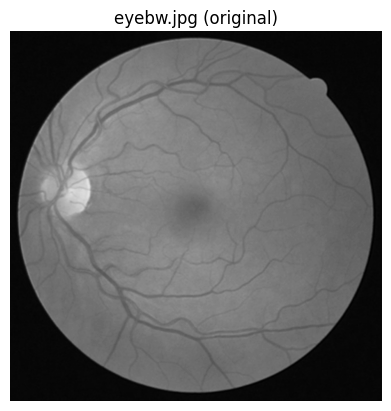

In [9]:
img2 = cv2.imread("images/eyebw.jpg",cv2.IMREAD_GRAYSCALE)
myplotimg(img2,title="eyebw.jpg (original)")

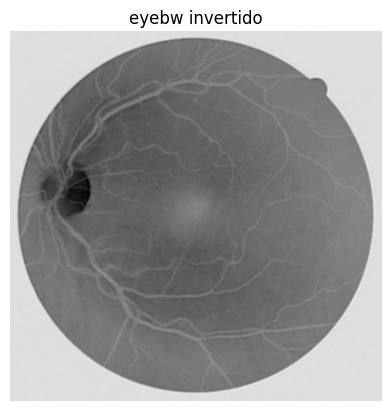

In [10]:
img2_neg = img_transform_neg(img2) 
myplotimg(img2_neg,title="eyebw invertido")

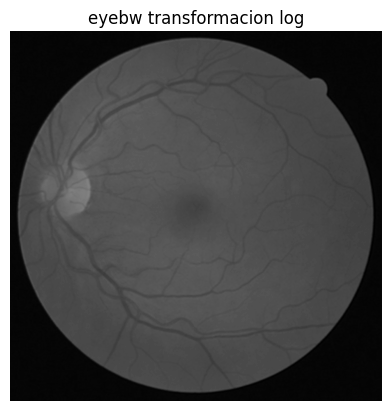

In [11]:
img2_log = img_transform_log(img2,c=0.8) 
myplotimg(img_transform_log(img2,c=0.8),title="eyebw transformacion log")

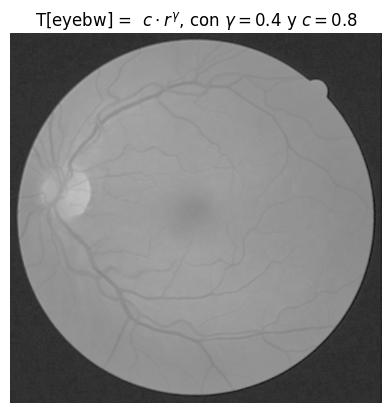

In [12]:
myplotimg(img_transform_exp(img2,c=0.8,gamma=0.4),title=r'T[eyebw] =  $c\cdot r^{\gamma}$, con $\gamma = 0.4$ y $c = 0.8$')

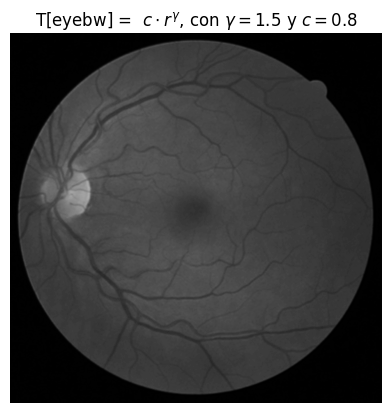

In [13]:
myplotimg(img_transform_exp(img2,c=0.8,gamma=1.5),title=r'T[eyebw] =  $c\cdot r^{\gamma}$, con $\gamma = 1.5$ y $c = 0.8$')

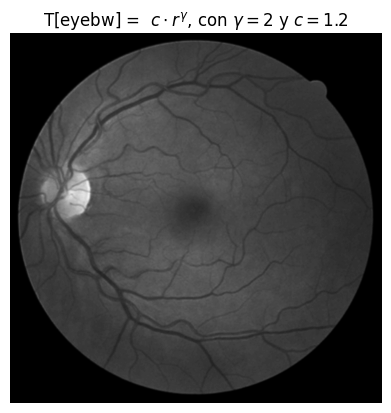

In [14]:
img2_exp = img_transform_exp(img2,c=1.2,gamma=2) 
myplotimg(img_transform_exp(img2,c=1.2,gamma=2),title=r'T[eyebw] =  $c\cdot r^{\gamma}$, con $\gamma = 2$ y $c = 1.2$')

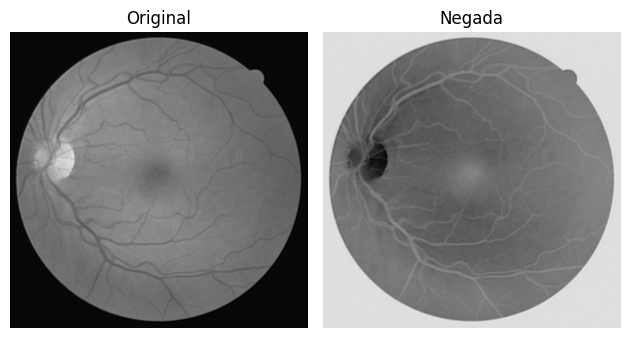

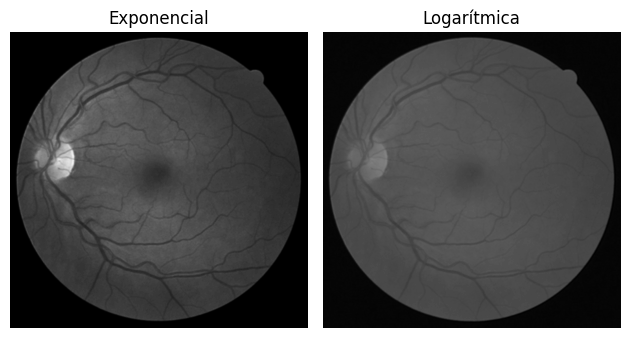

In [15]:
show_side_by_side([img2, img2_neg], subtitles = ["Original","Negada"], title = None, vmin=0, vmax=255)
show_side_by_side([img2_exp, img2_log], subtitles = ["Exponencial","Logarítmica"], title = None, vmin=0, vmax=255)

## 3) 
Bit plane slicing